In [1]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)

lam = 1064*10**(-9) # Normalized wavelength
d = lam/2 # lattice constant
c = 3.0*10**8 # speed of light [m/s]
f = c/lam # laser frequency [Hz]
k1 = 2*np.pi*np.array([0,1]) # reciprocal lattice vector 1
k2 = 2*np.pi*np.array([np.sqrt(3)/2, -1/2]) # reciprocal lattice vector 2
k3 = 2*np.pi*np.array([-np.sqrt(3)/2, -1/2]) # reciprocal lattice vector 3

v12 = 3 # Depth of Diagonal lattice created by lattice beam 1 and 2
v23 = 3 # 
v31 = 3

b1 = k2-k3
b2 = k3-k1
b3 = k1-k2

vx = 1.5*10**2 # FM deviation [Hz] 
vy = 0*1.5*10**2 # FM deviation [Hz]
Ω  = 2*np.pi*2*10**3 # FM mod. freq. [rad・Hz]

numpy: 1.19.2
matplotlib: 3.3.2


Assuming that laser frequencies of two beams are modulcated, each electric field of three beams for a shaken triangular lattice can be written as
$$
\begin{align}
\boldsymbol{E}_1 &= E_1 \boldsymbol{\hat{e}}_z \rm{exp} \left[ i \omega_1 t - i \boldsymbol{k}_1 \cdot \boldsymbol{r} + \phi_1 \right]& \\
\boldsymbol{E}_2 &= E_2 \boldsymbol{\hat{e}}_z \rm{exp} \left[ i \tilde{\omega}_2 t - i \boldsymbol{\tilde{k}}_2 \cdot \boldsymbol{r} + \phi_2 \right]& \\
\boldsymbol{E}_3 &= E_3 \boldsymbol{\hat{e}}_z \rm{exp} \left[ i \tilde{\omega}_3 t - i \boldsymbol{\tilde{k}}_3 \cdot \boldsymbol{r} + \phi_3 \right]& \\
\end{align}
$$
,where 
$$
\begin{align}
\boldsymbol{k}_1 &= k_1 (0,1) = \frac{2\pi f_1}{c}(0,1) \\ 
\boldsymbol{\tilde{k}}_2 &= \tilde{k}_2 \left(\frac{\sqrt{3}}{2}, -\frac{1}{2} \right) = \frac{2\pi}{c} (f_1 + \delta f_2) \left(\frac{\sqrt{3}}{2}, -\frac{1}{2}\right) \\
\boldsymbol{\tilde{k}}_3 &= \tilde{k}_3 \left(-\frac{\sqrt{3}}{2}, -\frac{1}{2} \right) = \frac{2\pi}{c} (f_1 + \delta f_3) \left(-\frac{\sqrt{3}}{2}, -\frac{1}{2}\right) \\
\omega_1 &= 2 \pi f_1 \\
\tilde{\omega}_2 &= 2 \pi (f_1 +\delta f_2) \\
\tilde{\omega}_3 &= 2 \pi (f_1 +\delta f_3). \\
\end{align} 
$$
For convenience, we introduce following symbols:
$$
\begin{align}
\boldsymbol{k}_2 &= k_1 \left(\frac{\sqrt{3}}{2}, -\frac{1}{2} \right) \\
\boldsymbol{k}_3 &= k_1 \left(\frac{\sqrt{3}}{2}, -\frac{1}{2} \right) \\
\boldsymbol{b}_1 &= \boldsymbol{k}_2 -\boldsymbol{k}_3 = k_1 (\sqrt{3},0) \\
\boldsymbol{b}_2 &= \boldsymbol{k}_3 -\boldsymbol{k}_1 = k_1 \left(-\frac{\sqrt{3}}{2},-\frac{3}{2}\right) \\
\boldsymbol{b}_3 &= \boldsymbol{k}_1 -\boldsymbol{k}_2 = k_1 \left(-\frac{\sqrt{3}}{2},\frac{3}{2}\right) \\
v_{12} &=E_1*E_2 \\
v_{23} &=E_2*E_3 \\
v_{31} &=E_3*E_1 \\
\end{align}
$$
Using the above-defined symbols, intensity of the total electric field is expressed as
$$
\begin{align}
I(\boldsymbol{r},t) & \propto \left| \boldsymbol{E}_1+\boldsymbol{E}_2+\boldsymbol{E}_3 \right|^2 \\
 &= {\rm{offset}} + \frac{v_{12}}{2} {\rm{cos}} \left[ -2 \pi \delta f_2 t - \boldsymbol{b}_3 \cdot \boldsymbol{r} + \frac{\delta f_2}{f_1} \boldsymbol{k}_2 \cdot \boldsymbol{r} \right] \\ 
 &+ \frac{v_{23}}{2} {\rm{cos}} \left[ -2\pi (\delta f_3 - \delta f_2)t - \boldsymbol{b}_1 \cdot \boldsymbol{r} - \frac{\delta f_2}{f_1} \boldsymbol{k}_2 \cdot \boldsymbol{r} + \frac{\delta f_3}{f_1} \boldsymbol{k}_3 \cdot \boldsymbol{r}  \right] + \frac{v_{31}}{2} {\rm{cos}} \left[ 2\pi \delta f_3 t - \boldsymbol{b}_2 \cdot \boldsymbol{r} - \frac{\delta f_3}{f_1} \boldsymbol{k}_3 \cdot \boldsymbol{r} \right] \\
\end{align}
$$
Note that terms related to $\phi_1, \phi_2, \phi_3$ are omitted for simplicity.

In [2]:
N = 200 # Meshsize
fps = 5 # frame per sec
frn = 150 # frame number of the animation
t_max = 5*10**(-3) #duration [s]

x = np.linspace(-1.5,1.5,N+1)
X, Y = np.meshgrid(x, x)
zarray = np.zeros((N+1, N+1, frn))

for i in range(frn):
    t = t_max/frn*i
#     df2 = vx*np.sin(Ω*t)+vy*np.cos(Ω*t)
#     df3 = -vx*np.sin(Ω*t)+vy*np.cos(Ω*t)
    df2 = vx*np.sin(Ω*t)
    df3 = vy*np.cos(Ω*t)
    zarray[:,:,i] = list(map(lambda x,y: -v12/2*np.cos(-2*np.pi*df2*t-np.inner(b3,np.array([x,y]).T)+df2/f*np.inner(k2,np.array([x,y]).T))-v23/2*np.cos(-2*np.pi*(df3-df2)*t-np.inner(b1,np.array([x,y]).T)-df2/f*np.inner(k2,np.array([x,y]).T)+df3/f*np.inner(k3,np.array([x,y]).T))-v31/2*np.cos(2*np.pi*df3*t-np.inner(b2,np.array([x,y]).T)-df3/f*np.inner(k3,np.array([x,y]).T)), X,Y))


<IPython.core.display.Javascript object>


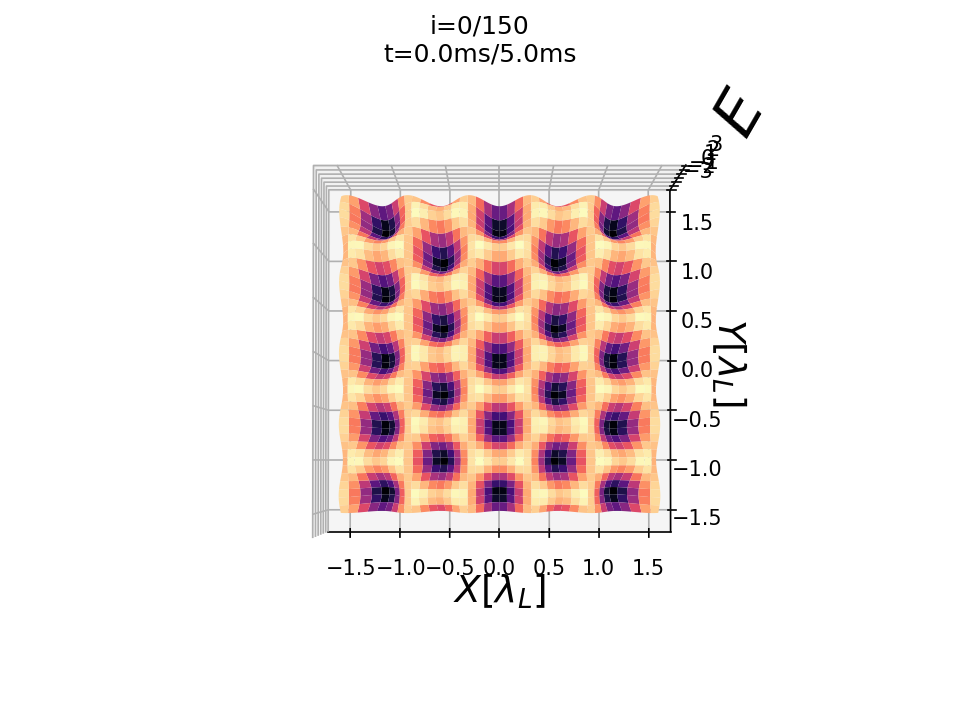

In [3]:
%matplotlib nbagg
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:,:,frame_number], cmap="magma")
    fig.suptitle("i="+str(frame_number)+"/"+str(frn)+"\n"+"t="+str(round(t_max/frn*frame_number*10**3,2))+"ms"+"/"+str(t_max*10**3)+"ms")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.suptitle("i="+"0"+"/"+str(frn)+","+"t=0"+"ms"+"/"+str(t_max*10**3)+"ms")

plot = [ax.plot_surface(X, Y, zarray[:,:,0], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(-3,3)
ax.view_init(elev=88, azim=270)
ax.set_xlabel(r'$X[\lambda_L]$', fontsize=18)
ax.set_ylabel(r'$Y[\lambda_L]$', fontsize=18, rotation=60)
ax.set_zlabel(r'$E$', fontsize=30,rotation=60)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(zarray, plot), interval=1000/fps)

In [4]:
from matplotlib.animation import PillowWriter
fn = 'plot_surface_animation_funcanimation'
ani.save(fn+'.gif',writer='pillow',fps=fps)